# BIL 570 Project : Titanic Incident Survivor Analysis
Emincan Keresteci 211211034

In [89]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import tensorflow as tf
import sklearn
from tensorflow import keras
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<h2> Data Analysis

In [90]:
train_data = pd.read_csv("train.csv")
train_data.style

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


In [91]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [92]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [93]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [94]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [95]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [195]:
train = train_data.drop(columns=['PassengerId','Name','Ticket','Cabin'])
train.replace(['male','female','S','C','Q'],[0,1,0,1,2],inplace=True)
train.interpolate(inplace=True)

mmscl = lambda c: (c - c.min()) / ( c.max() - c.min())#min-max-scaling
for col in train.columns:
    train[col] = mmscl(train[col])
train.style

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,1.000000,0.000000,0.271174,0.125000,0.000000,0.014151,0.000000
1,1.000000,0.000000,1.000000,0.472229,0.125000,0.000000,0.139136,0.500000
2,1.000000,1.000000,1.000000,0.321438,0.000000,0.000000,0.015469,0.000000
3,1.000000,0.000000,1.000000,0.434531,0.125000,0.000000,0.103644,0.000000
4,0.000000,1.000000,0.000000,0.434531,0.000000,0.000000,0.015713,0.000000
5,0.000000,1.000000,0.000000,0.553908,0.000000,0.000000,0.016510,1.000000
6,0.000000,0.000000,0.000000,0.673285,0.000000,0.000000,0.101229,0.000000
7,0.000000,1.000000,0.000000,0.019854,0.375000,0.166667,0.041136,0.000000
8,1.000000,1.000000,1.000000,0.334004,0.000000,0.333333,0.021731,0.000000
9,1.000000,0.500000,1.000000,0.170646,0.125000,0.000000,0.058694,0.500000


In [97]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [98]:
x = train.drop(columns=['Survived'])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0


<AxesSubplot:xlabel='count', ylabel='Survived'>

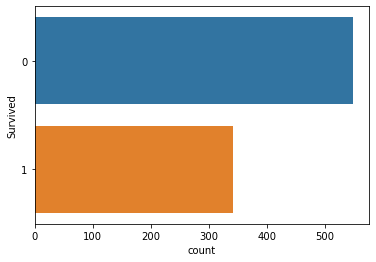

In [99]:
y = train['Survived']
import seaborn as sb
sb.countplot(y = y)

<h2>Correlation Matrix

<AxesSubplot:>

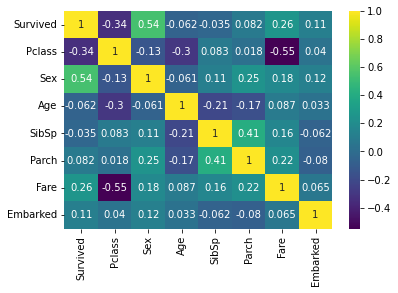

In [100]:
corm = train.corr()
sb.heatmap(corm,annot=True,cmap='viridis')

<h2>Pairplots

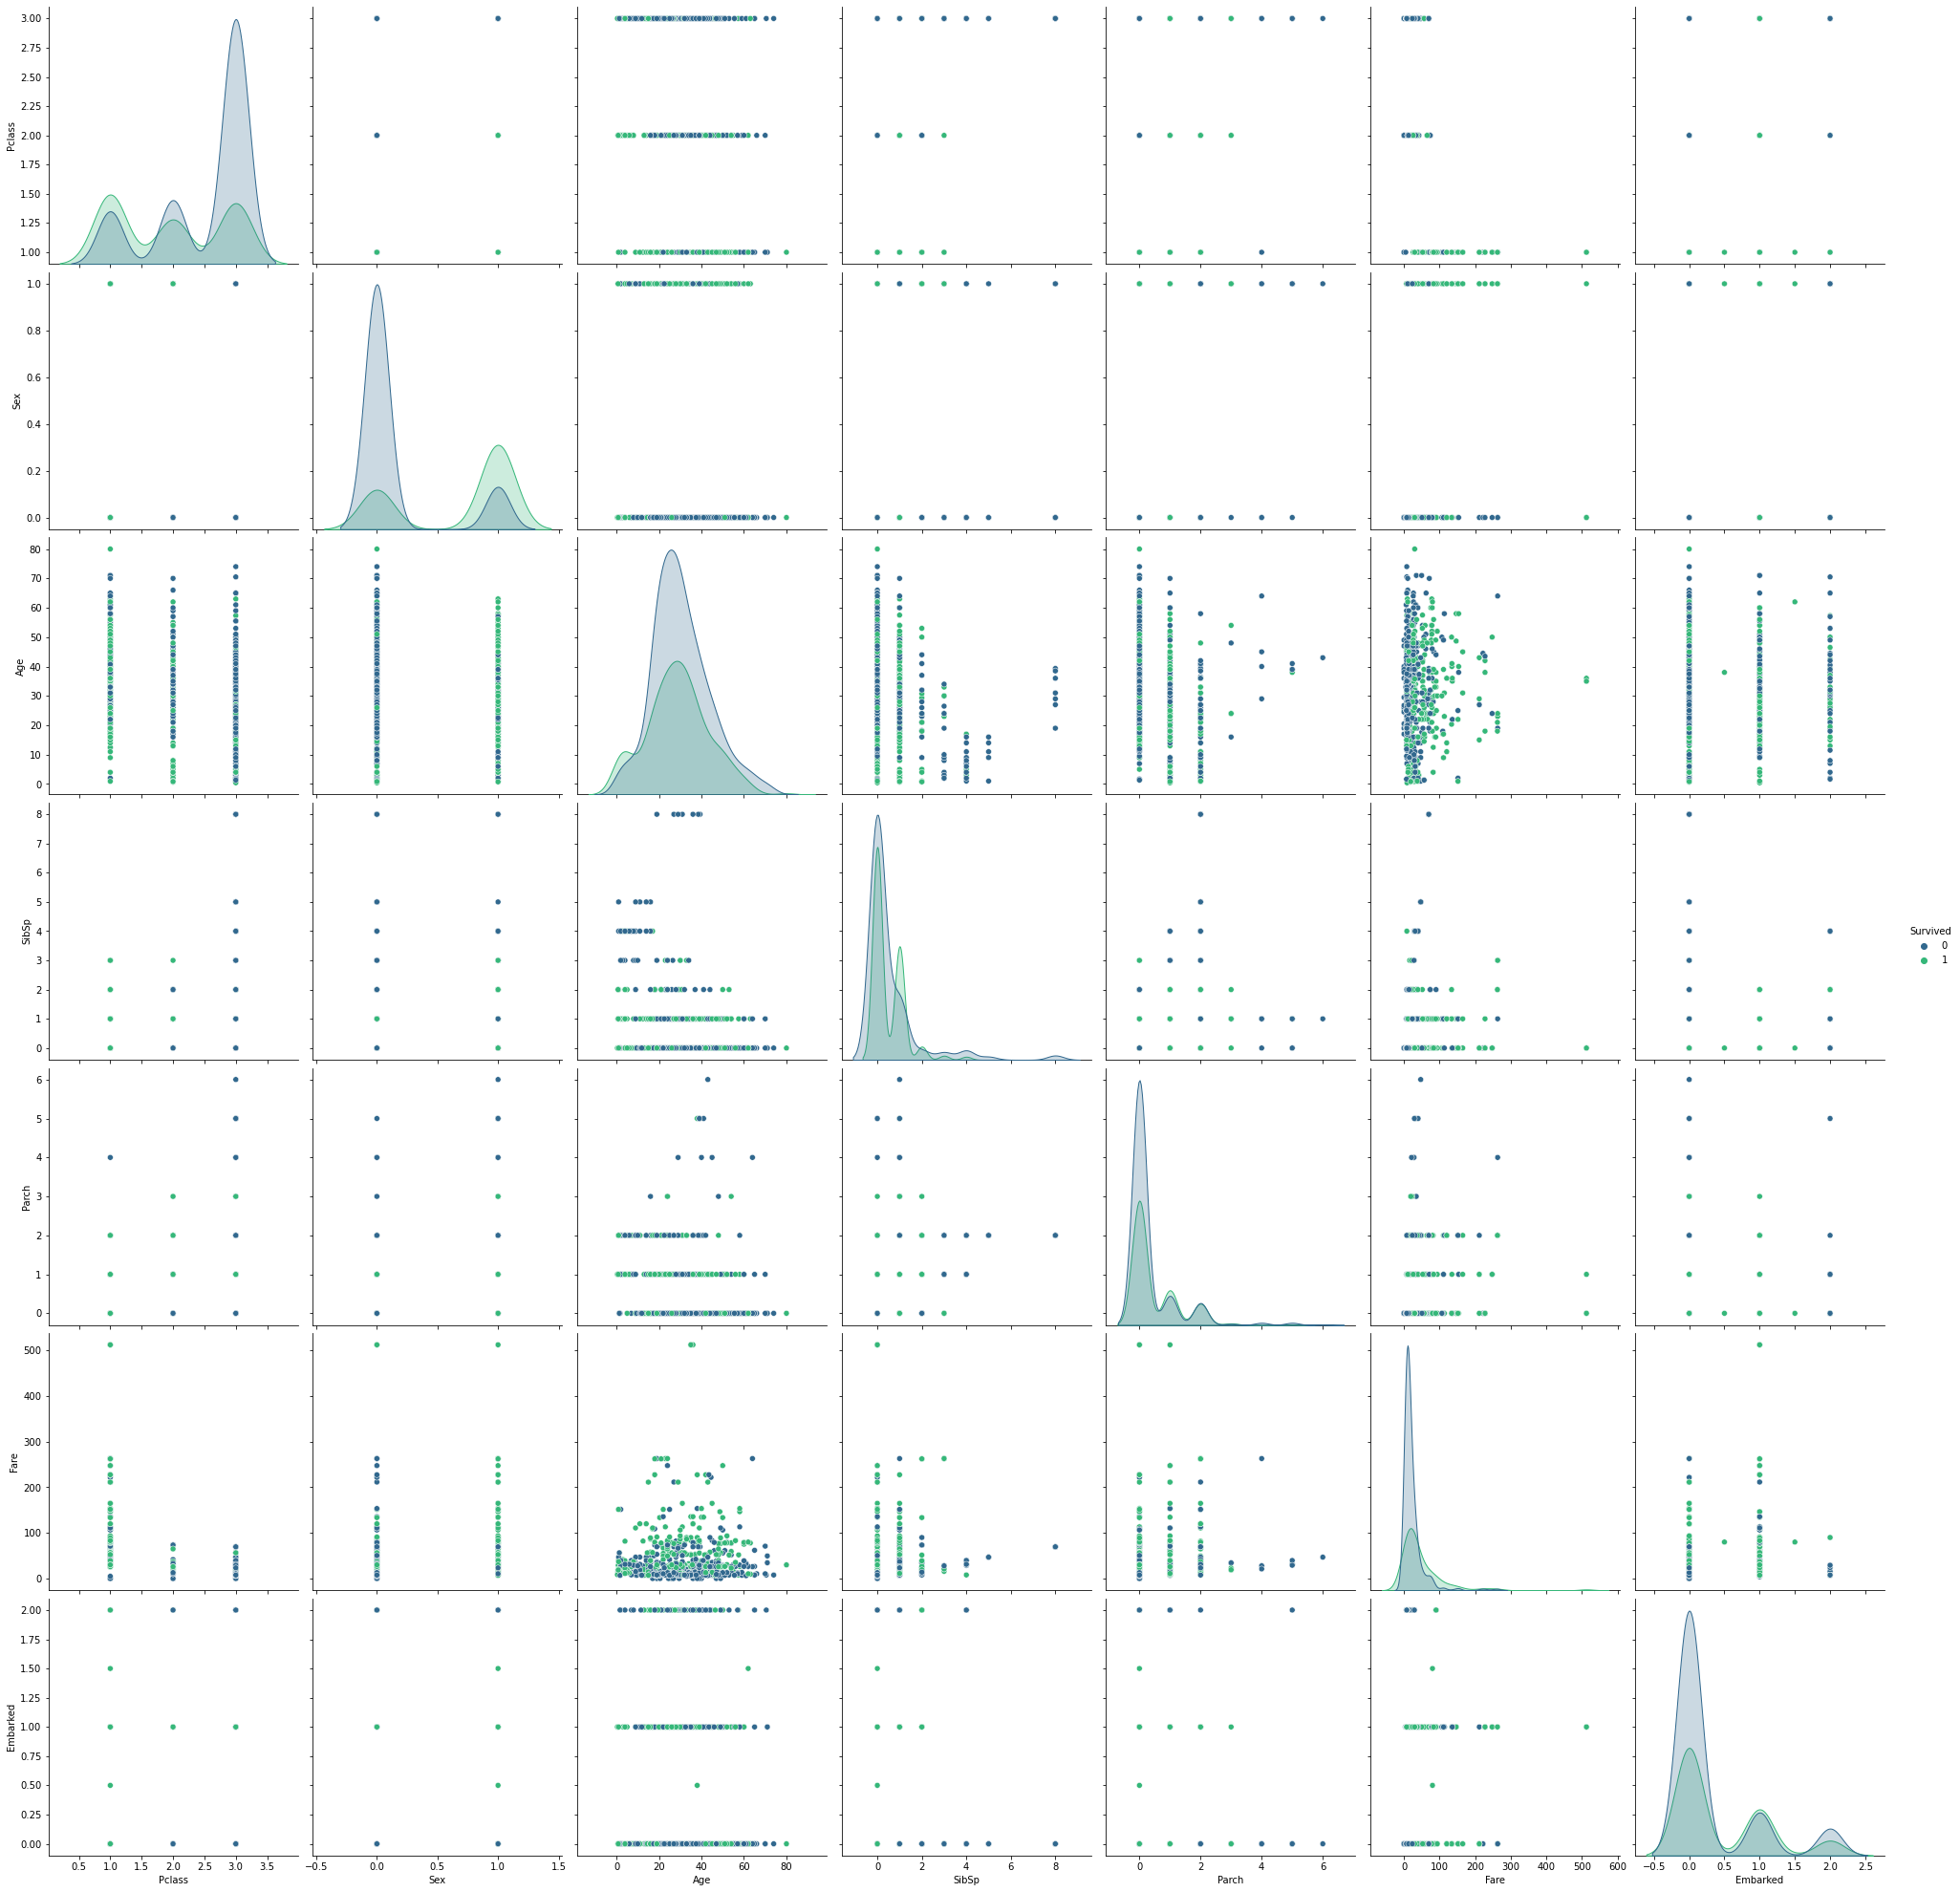

In [101]:
%matplotlib inline
sb.pairplot(train,hue='Survived',height=4,palette='viridis')

<h2>Clustering

In [173]:
from sklearn.cluster import KMeans

In [196]:
kmeans = KMeans(2)
kmeans.fit(train)
print("K-Means Clustering Test Score:     "+str(kmeans.score(train)))

K-Means Clustering Test Score:     -437.7212140233163


<h2>Training Miscellaneous Models and Testing

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=33)
from sklearn.model_selection import GridSearchCV
models={}
scores={}

<h3>Nearest Neighbour Classifier

In [199]:
from sklearn.neighbors import KNeighborsClassifier
near = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [i for i in range(1,10)]
    }
gs = GridSearchCV(near, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'n_neighbors': 8}
Best Score: 0.6952624839948782


In [200]:
near = KNeighborsClassifier(8)
near.fit(x_train, y_train)
print("Nearest Neighbor Test Score:     "+str(near.score(x_test, y_test)))
models.update(NearN=near)
scores.update(NearN=near.score(x_test, y_test))

Nearest Neighbor Test Score:     0.6927374301675978


<h3>Naive Bayes Classifier

In [197]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train, y_train)
print("Naive Bayes:     "+str(naive.score(x_test, y_test)))
models.update(NaiveBayes=naive)
scores.update(NaiveBayes=naive.score(x_test, y_test))

Naive Bayes:     0.7932960893854749


<h3>Quadratic Discriminant Analysis

In [108]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
print("Quadratic Discriminant Analysis:  "+str(qda.score(x_test, y_test)))

Quadratic Discriminant Analysis:  0.7597765363128491


<h3>Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs',max_iter=1000)
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogReglbfgs=lr)
scores.update(LogReglbfgs=lr.score(x_test, y_test))

LinearReg:     0.7988826815642458


In [110]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogRegnewtoncg=lr)
scores.update(LogRegnewtoncg=lr.score(x_test, y_test))

LinearReg:     0.7988826815642458


In [111]:
lr = LogisticRegression(solver='sag',max_iter=10000)
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogRegsag=lr)
scores.update(LogRegsag=lr.score(x_test, y_test))

LinearReg:     0.8100558659217877


In [112]:
lr = LogisticRegression(solver='saga',max_iter=10000)
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogRegsaga=lr)
scores.update(LogRegsaga=lr.score(x_test, y_test))

LinearReg:     0.7932960893854749


In [113]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)
print("LogReg:     "+str(lr.score(x_test, y_test)))
models.update(LogRegliblinear=lr)
scores.update(LogRegliblinear=lr.score(x_test, y_test))

LinearReg:     0.7988826815642458


In [114]:
ix = ['Sex','Fare']
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train[ix], y_train)
print("LogReg:     "+str(lr.score(x_test[ix], y_test)))
models.update(LogRegliblinear2features=lr)
scores.update(LogRegliblinear2features=lr.score(x_test[ix], y_test))

LinearReg:     0.776536312849162


<h3>Decision Tree Classifier

In [115]:
from sklearn.tree import *

In [116]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [i for i in range(5,15)],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_leaf_nodes': [i for i in range(10,40)]}
gs = GridSearchCV(dt, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'max_depth': 12, 'max_leaf_nodes': 30, 'min_samples_leaf': 2}
Best Score: 0.7992317541613316


Decision Tree Test Score:     0.8435754189944135


<Figure size 1200x1200 with 0 Axes>

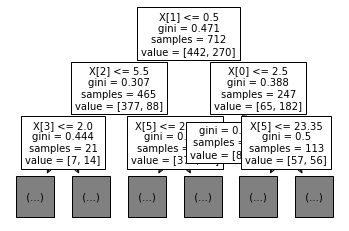

<Figure size 1200x1200 with 0 Axes>

In [117]:
%matplotlib inline
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, max_leaf_nodes=18)
dt.fit(x_train, y_train)
print("Decision Tree Test Score:     "+str(dt.score(x_test, y_test)))
models.update(DecTree=dt)
scores.update(DecTree=dt.score(x_test, y_test))
plot_tree(dt,fontsize=10,max_depth=2)
plt.figure(figsize=(12,12), dpi=100)

<h3>Ensemble Classifiers

In [118]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

<h4>Random Forest

In [119]:
rf = RandomForestClassifier()
param_grid = {
    #'max_depth': [i for i in range(5,15)],
    #'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    #'max_leaf_nodes': [i for i in range(10,40)],
    'n_estimators': [i*10 for i in range(5,25)]
}
gs = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'n_estimators': 130}
Best Score: 0.8048163104501131


In [120]:
rf = RandomForestClassifier(n_estimators=130, max_depth=14, min_samples_leaf=4, max_leaf_nodes=34)
rf.fit(x_train, y_train)
print("Random Forest Test Score:  "+str(rf.score(x_test, y_test)))
models.update(RandomForest=rf)
scores.update(RandomForest=rf.score(x_test, y_test))

Random Forest Test Score:  0.8379888268156425


<h4>AdaBoost

In [121]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
print("AdaBoost:  "+str(ada.score(x_test, y_test)))
models.update(AdaBoost=ada)
scores.update(AdaBoost=ada.score(x_test, y_test))

AdaBoost:  0.8156424581005587


<h4>Gradient Boost

In [122]:
gb = GradientBoostingClassifier( min_samples_leaf=4, max_depth=5, max_leaf_nodes=17, learning_rate=0.15 )# n_estimators=60, 
param_grid = {
    #'max_depth': [i for i in range(5,15)],
    #'learning_rate': [i*0.1 for i in range(5,25)],
    #'max_leaf_nodes': [i for i in range(10,40)],
    #'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'n_estimators': [i*5 for i in range(10,40)]
}
gs = GridSearchCV(gb, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'n_estimators': 55}
Best Score: 0.8104501132670145


In [123]:
gb = GradientBoostingClassifier(n_estimators=55, max_depth=5, min_samples_leaf=6, max_leaf_nodes=17, learning_rate=0.15)
gb.fit(x_train, y_train)
print("GradientBoost:  "+str(gb.score(x_test, y_test)))
models.update(GradientBoost=gb)
scores.update(GradientBoost=gb.score(x_test, y_test))

GradientBoost:  0.8603351955307262


<h4>Extreme Gradient Boost

In [124]:
from xgboost import XGBClassifier

In [125]:
xgb = XGBClassifier( n_estimators=60, max_depth=5, max_leaves=17, learning_rate=0.09 )#  
param_grid = {
    #'max_depth': [i for i in range(5,15)],
    #'learning_rate': [i*0.1 for i in range(1,10)],
    #'max_leaves': [i for i in range(10,40)],
    'n_estimators': [i*5 for i in range(10,40)]
}
gs = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'n_estimators': 80}
Best Score: 0.818881118881119


In [126]:
xgb = XGBClassifier(n_estimators=80, max_depth=5,  max_leaves=17, learning_rate=0.09)
xgb.fit(x_train, y_train)
print("ExtremeGradientBoost:  "+str(xgb.score(x_test, y_test)))
models.update(XGBoost=xgb)
scores.update(XGBoost=xgb.score(x_test, y_test))

ExtremeGradientBoost:  0.8435754189944135


<h3>Support Vector Machine Classifier

In [127]:
from sklearn.svm import SVC

In [128]:
svm = SVC()# kernel rbf by default
param_grid = {
    'C': [i/10 for i in range(1,30)],
    'gamma': [*[10**(-i) for i in range(5)], *[2,3,4]]}
gs = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'C': 2.7, 'gamma': 0.01}
Best Score: 0.7233330050231459


In [129]:
svm = SVC(gamma = 0.001, C = 2.8) # kernel rbf by default
svm.fit(x_train, y_train)
print("SVM Rbf Test Score")
print(svm.score(x_test, y_test))
models.update(SVMRbf=svm)
scores.update(SVMRbf=svm.score(x_test, y_test))

SVM Rbf Test Score
0.6927374301675978


In [130]:
#Utilizing the most correlated features to the target
ix = ['Sex','Fare']
svm = SVC()# kernel rbf by default
param_grid = {
    'C': [i/10 for i in range(1,30)],
    'gamma': [*[10**(-i) for i in range(5)], *[2,3,4]]}
gs = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train[ix], y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'C': 1.7, 'gamma': 1}
Best Score: 0.7766374470599823


In [131]:
svm = SVC(gamma = 1, C = 2.3) # kernel rbf by default
ix = ['Sex','Fare']
svm.fit(x_train[ix], y_train)
print("SVM RBF Test Score with the features Sex and Fare only")
print(svm.score(x_test[ix], y_test))
models.update(SVMRbf2features=svm)
scores.update(SVMRbf2features=svm.score(x_test[ix], y_test))

SVM RBF Test Score with the features Sex and Fare only
0.8044692737430168


In [132]:
svm = SVC(kernel="linear")
param_grid = {
    'C': [i/100 for i in range(1,20)]}
gs = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'C': 0.03}
Best Score: 0.787924751305033


In [133]:
svm = SVC(kernel="linear",  C = 0.02) 
svm.fit(x_train, y_train)
print("SVM Test Score with kernel Linear")
print(svm.score(x_test, y_test))
models.update(SVMlinear=svm)
scores.update(SVMlinear=svm.score(x_test, y_test))

SVM Test Score with kernel Linear
0.7877094972067039


In [134]:
svm = SVC(kernel="sigmoid")
param_grid = {
    'C': [i/10 for i in range(1,300)],
    'gamma': [*[10**(-i) for i in range(10)], *[2,3,4] ]
}
gs = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'C': 18.7, 'gamma': 1e-05}
Best Score: 0.6755835713582193


In [135]:
svm = SVC(kernel="sigmoid",gamma = 0.0001, C = 22.5) # kernel rbf by default
svm.fit(x_train, y_train)
print("SVM Test Score with kernel Sigmoid")
print(svm.score(x_test, y_test))
models.update(SVMsigmoid=svm)
scores.update(SVMsigmoid=svm.score(x_test, y_test))

SVM Test Score with kernel Sigmoid
0.5810055865921788


<h3>Neural Network Classifier

<h4>Sklearn Mlp Model

In [136]:
from sklearn.neural_network import MLPClassifier

In [137]:
mlp = MLPClassifier(random_state=4,max_iter=2000)

param_grid = {
    'hidden_layer_sizes': [i for i in range(1,15)],
    #'learning_rate_init': [.001,.01,.1,.0001,1],
    #'momentum': [i/10 for i in range(1,5)]
}
gs = GridSearchCV(mlp, param_grid, scoring='accuracy', cv=5)
gs.fit(x_train, y_train)
print("Best Parameters: ", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters:  {'hidden_layer_sizes': 11}
Best Score: 0.8216290751502019


In [138]:
mlp = MLPClassifier(hidden_layer_sizes=(11,),learning_rate_init=0.01, momentum=0.1, random_state=4, max_iter=2000)
mlp.fit(x_train, y_train)
print("MLP Test Score")
print(mlp.score(x_test, y_test))
models.update(MLP=mlp)
scores.update(MLP=mlp.score(x_test, y_test))

MLP Test Score
0.8268156424581006


<h4>ANN using Tensorflow Keras 

In [139]:
#Shallow-Narrow Model
model = keras.models.Sequential([
        keras.layers.Dense(4, kernel_initializer = 'uniform', activation = 'elu',input_shape=(7,)),
        keras.layers.Dense(2, kernel_initializer = 'uniform', activation = 'elu'),
        keras.layers.Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid')
    ])
print(model.summary())

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 4)                 32        
                                                                 
 dense_105 (Dense)           (None, 2)                 10        
                                                                 
 dense_106 (Dense)           (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
23/23 [==============================] - 2s 21ms/step - loss: 0.6775 - accuracy: 0.6419 - val_loss: 0.6599 - val_accuracy: 0.6313
Epoch 2/40
23/23 [==============================] - 0s 6ms/step - loss: 0.6174 - accuracy: 0.6896 - val_loss: 0.6458 - val_accuracy: 0.6257
Epoch 3/40
23/23 [=================

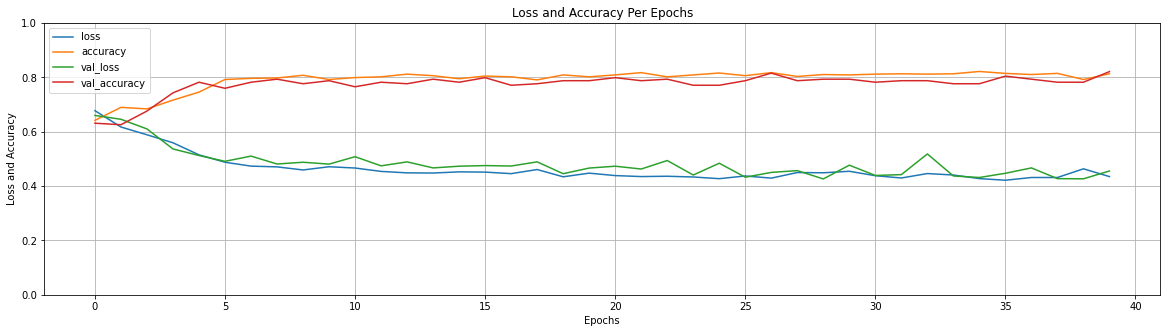

6/6 [==============================] - 0s 4ms/step - loss: 0.4556 - accuracy: 0.8212
0.8212290406227112


In [140]:
history.params
history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 5))
plt.title('Loss and Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
score=model.evaluate(x_test, y_test)[1]
print(score)
models.update(ANN_2_4=model)
scores.update(ANN_2_4=score)

In [169]:
#Deep-Narrow ELU
model = keras.models.Sequential([
        keras.layers.Dense(7, activation="elu",input_shape=(7,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(7, activation="elu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(7, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(7, activation="elu"), 
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(7, activation="elu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(7, activation="elu"),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(7, activation="elu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(7, activation="elu"),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(7, activation="elu"),
        keras.layers.BatchNormalization(),  
        keras.layers.Dense(7, activation="elu"),
        keras.layers.BatchNormalization(), 
        keras.layers.Dense(4, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ])

print(model.summary())

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 7)                 56        
                                                                 
 batch_normalization_119 (Ba  (None, 7)                28        
 tchNormalization)                                               
                                                                 
 dropout_14 (Dropout)        (None, 7)                 0         
                                                                 
 dense_189 (Dense)           (None, 7)                 56        
                                                                 
 batch_normalization_120 (Ba  (None, 7)                28        
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 7)               

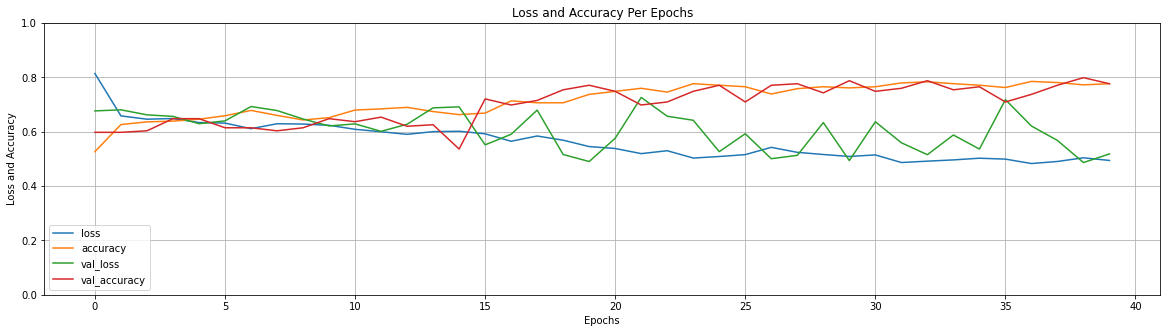

6/6 [==============================] - 0s 4ms/step - loss: 0.5184 - accuracy: 0.7765
0.7765362858772278


In [170]:
history.params
history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 5))
plt.title('Loss and Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
score=model.evaluate(x_test, y_test)[1]
print(score)
models.update(ANN_11_7=model)
scores.update(ANN_11_7=score)

In [143]:
#Shallow-Wide Model
model = keras.models.Sequential([
        keras.layers.Dense(100, activation="elu",input_shape=(7,)),
        keras.layers.Dense(50, activation="elu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])

print(model.summary())

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 100)               800       
                                                                 
 dense_118 (Dense)           (None, 50)                5050      
                                                                 
 dense_119 (Dense)           (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
23/23 [==============================] - 2s 21ms/step - loss: 1.3662 - accuracy: 0.6180 - val_loss: 0.7524 - val_accuracy: 0.6592
Epoch 2/40
23/23 [==============================] - 0s 6ms/step - loss: 0.6370 - accuracy: 0.6503 - val_loss: 0.6745 - val_accuracy: 0.5922
Epoch 3/40
23/23 [===========

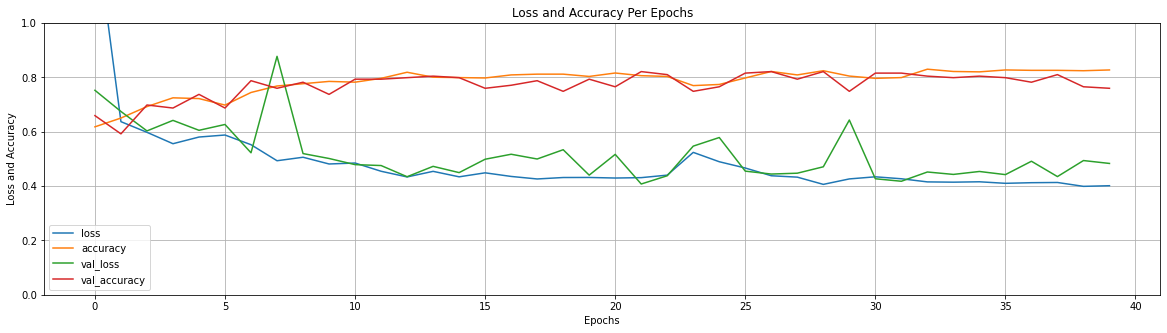

6/6 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7598
0.7597765326499939


In [144]:
history.params
history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 5))
plt.title('Loss and Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
score=model.evaluate(x_test, y_test)[1]
print(score)
models.update(ANN_2_100=model)
scores.update(ANN_2_100=score)

In [145]:
#Deep-Wide ELU BN 11 layers
model = keras.models.Sequential([
        keras.layers.Dense(1000, activation="elu",input_shape=(7,)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(900, activation="elu"),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(800, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(400, activation="elu"),  
        keras.layers.BatchNormalization(),
        keras.layers.Dense(200, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(100, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(80, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(40, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(30, activation="elu"),  
        keras.layers.BatchNormalization(),
        keras.layers.Dense(20, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation="elu"),  
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ])

print(model.summary())

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 1000)              8000      
                                                                 
 batch_normalization_66 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_121 (Dense)           (None, 900)               900900    
                                                                 
 batch_normalization_67 (Bat  (None, 900)              3600      
 chNormalization)                                                
                                                                 
 dense_122 (Dense)           (None, 800)               720800    
                                                                 
 batch_normalization_68 (Bat  (None, 800)            

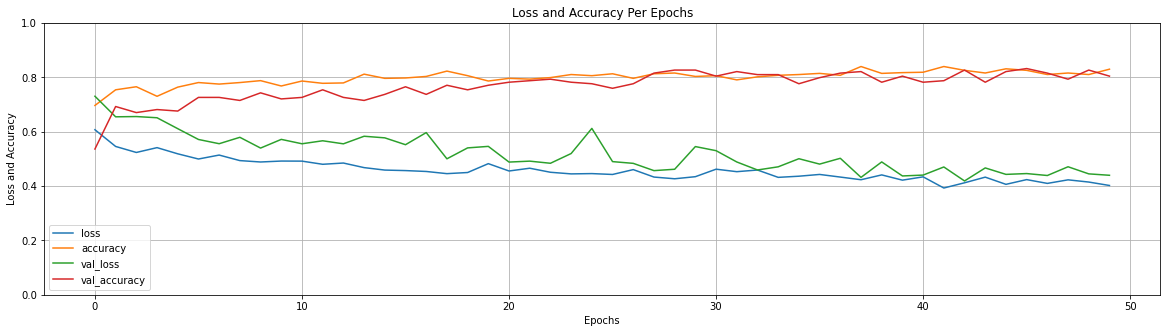

6/6 [==============================] - 0s 14ms/step - loss: 0.4397 - accuracy: 0.8045
0.8044692873954773


In [146]:
history.params
history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 5))
plt.title('Loss and Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
score=model.evaluate(x_test, y_test)[1]
print(score)
models.update(ANN_11_1000_BN=model)
scores.update(ANN_11_1000_BN=score)

In [147]:
#Deep-Wide ELU BN 11 layers Dropout 2x%20
model = keras.models.Sequential([
        keras.layers.Dense(1000, activation="elu",input_shape=(7,)),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(900, activation="elu"),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(800, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(400, activation="elu"),  
        keras.layers.BatchNormalization(),
        keras.layers.Dense(200, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(100, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(80, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(40, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(30, activation="elu"),  
        keras.layers.BatchNormalization(),
        keras.layers.Dense(20, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation="elu"),  
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ])

print(model.summary())

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 1000)              8000      
                                                                 
 dropout_8 (Dropout)         (None, 1000)              0         
                                                                 
 batch_normalization_77 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_133 (Dense)           (None, 900)               900900    
                                                                 
 dropout_9 (Dropout)         (None, 900)               0         
                                                                 
 batch_normalization_78 (Bat  (None, 900)              3600      
 chNormalization)                                    

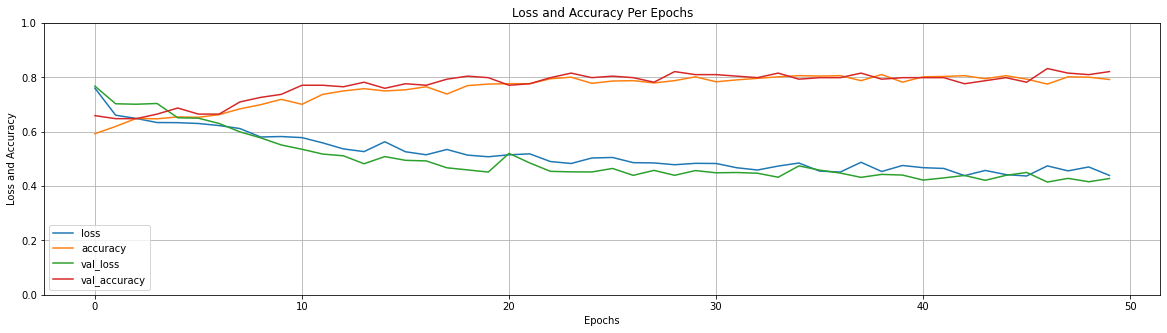

6/6 [==============================] - 0s 14ms/step - loss: 0.4278 - accuracy: 0.8212
0.8212290406227112


In [148]:
history.params
history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 5))
plt.title('Loss and Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
score=model.evaluate(x_test, y_test)[1]
print(score)
models.update(ANN_11_1000_BN_Dropout=model)
scores.update(ANN_11_1000_BN_Dropout=score)

In [149]:
#Deep-Wide ELU BN ReduceLR
model = keras.models.Sequential([
        keras.layers.Dense(1000, activation="elu",input_shape=(7,)),
        keras.layers.Dropout(0.1),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(900, activation="elu"),
        keras.layers.Dropout(0.1),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(800, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(400, activation="elu"),  
        keras.layers.BatchNormalization(),
        keras.layers.Dense(200, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(100, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(80, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(40, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(30, activation="elu"),  
        keras.layers.BatchNormalization(),
        keras.layers.Dense(20, activation="elu"), 
        keras.layers.BatchNormalization(),
        keras.layers.Dense(10, activation="elu"),  
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1, activation="sigmoid")
    ])

print(model.summary())

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.7, patience=7, min_lr=0.000000001)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=[reduce_lr])

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 1000)              8000      
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 batch_normalization_88 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_145 (Dense)           (None, 900)               900900    
                                                                 
 dropout_11 (Dropout)        (None, 900)               0         
                                                                 
 batch_normalization_89 (Bat  (None, 900)              3600      
 chNormalization)                                    

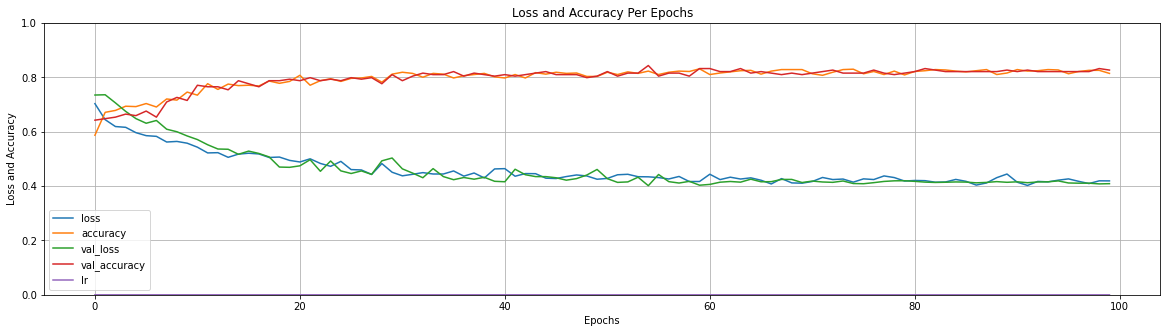

6/6 [==============================] - 0s 22ms/step - loss: 0.4089 - accuracy: 0.8268
0.826815664768219


In [150]:
history.params
history.history.keys()
pd.DataFrame(history.history).plot(figsize=(20, 5))
plt.title('Loss and Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss and Accuracy')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
score=model.evaluate(x_test, y_test)[1]
print(score)
models.update(ANN_11_1000_BN_ReduceLR=model)
scores.update(ANN_11_1000_BN_ReduceLR=score)

In [153]:
best_score = 0
for key, value in scores.items():
    print(key,":",round(value,3))
    if value > best_score:
        best_score = value
        best_key = key
best_model = models[best_key]

NearN : 0.693
KMeans : 0.704
NaiveBayes : 0.793
LinReglbfgs : 0.799
LinRegnewtoncg : 0.799
LinRegsag : 0.81
LinRegsaga : 0.793
LinRegliblinear : 0.799
LinRegliblinear2features : 0.777
DecTree : 0.844
RandomForest : 0.838
AdaBoost : 0.816
GradientBoost : 0.86
XGBoost : 0.844
SVMRbf : 0.693
SVMRbf2features : 0.804
SVMlinear : 0.788
SVMsigmoid : 0.581
MLP : 0.827
ANN_2_4 : 0.821
ANN_9_10 : 0.793
ANN_2_100 : 0.76
ANN_11_1000_BN : 0.804
ANN_11_1000_BN_Dropout : 0.821
ANN_11_1000_BN_ReduceLR : 0.827


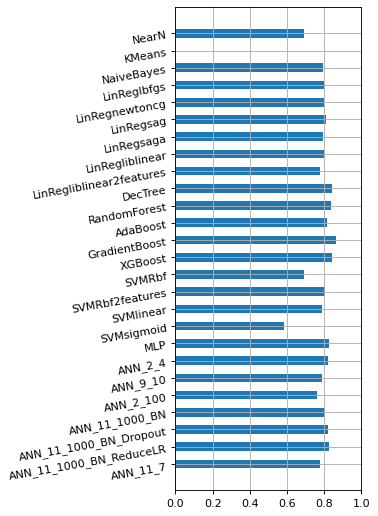

<Figure size 432x288 with 0 Axes>

In [187]:
names = list(scores.keys())
values = list(scores.values())
names.reverse()
values.reverse()
figure(figsize=(3, 8), dpi=80)
plt.grid(True)
plt.gca().set_xlim(0, 1)
plt.barh(range(len(scores)), values, 0.5, tick_label=names)
plt.yticks(rotation=10)
plt.show()
plt.savefig("models_barhplot")

<h4>Confusion Matrix and Classification Report

GradientBoostingClassifier(learning_rate=0.15, max_depth=5, max_leaf_nodes=17,
                           min_samples_leaf=6, n_estimators=55)
(179, 1) (179, 1)

Confusion Matrix :




<AxesSubplot:>

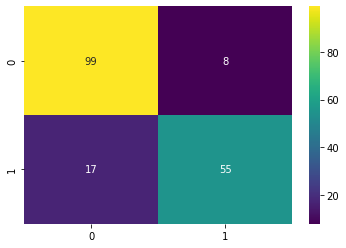

In [178]:
print(best_model)
ytrue = pd.DataFrame(y_test)
ypred = pd.DataFrame(best_model.predict(x_test)>0.5)
print(ytrue.shape,ypred.shape)
print('\nConfusion Matrix :\n\n')
confm = sklearn.metrics.confusion_matrix(ytrue,ypred)
sb.heatmap(confm,annot=True,cmap='viridis')

In [179]:
print('\n\nClassification Report : \n\n')
print(sklearn.metrics.classification_report(ytrue,ypred))



Classification Report : 


              precision    recall  f1-score   support

           0       0.85      0.93      0.89       107
           1       0.87      0.76      0.81        72

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



<h4>ROC and AUC

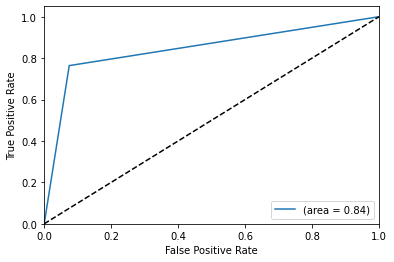

In [194]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_pred = pd.DataFrame(best_model.predict(x_test))
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_pred_bin = label_binarize(y_pred, classes=[0, 1])
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
classes = {0:"Setosa",1:"Versicolor",2:"Virginica"}
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='(area = {1:0.2f})'
                                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()